In [132]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import numpy as np
import os as os

In [105]:
os.getcwd()

'c:\\Users\\massi\\Programming\\START Hack\\Start_Hack21\\Visualization'

In [106]:
#print basic chart
def printChart(dataset_name, title):
    series = pd.read_csv('../dataset\Intraday/%s.csv' % (dataset_name), header=0, index_col=0, parse_dates=True, squeeze=True)
    series.plot()
    plt.title(title)
    plt.show()

In [107]:
datasets = ['1103','143289','143325']
dataset_names = ['pri de intraday €/mwh cet min15 a', 'VWAP (volume weight average price) of trades last trading hour before delivery start of hourly contracts.', 'VWAP (volume weight average price) of trades last 3 trading hours before delivery start of hourly contracts']
for i in range(len(datasets)):
    printChart(datasets[i], dataset_names[i])

FileNotFoundError: [Errno 2] No such file or directory: '../dataset\\Intraday/1103.csv'

In [108]:
series = pd.read_csv('../dataset/Intraday/De/143289.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#subsetting of time series
len(series)

5268

In [64]:
#Implement simple running mean

series_rolling = series.rolling(window=3).mean()
series_rolling.head(20)

0
2020-08-12 23:00:00          NaN
2020-08-13 00:00:00          NaN
2020-08-13 01:00:00    33.476667
2020-08-13 02:00:00    32.096667
2020-08-13 03:00:00    29.350000
2020-08-13 04:00:00    28.930000
2020-08-13 05:00:00    33.333333
2020-08-13 06:00:00    39.580000
2020-08-13 07:00:00    43.320000
2020-08-13 08:00:00    48.126667
2020-08-13 09:00:00    47.953333
2020-08-13 10:00:00    49.366667
2020-08-13 11:00:00    46.980000
2020-08-13 12:00:00    48.660000
2020-08-13 13:00:00    49.606667
2020-08-13 14:00:00    47.343333
2020-08-13 15:00:00    44.636667
2020-08-13 16:00:00    43.456667
2020-08-13 17:00:00    43.166667
2020-08-13 18:00:00    43.813333
Name: 1, dtype: float64

In [75]:
len(series_rolling) == len(series)

True

In [98]:
##Intraday prices: Alert for large price changes

def large_price_change(series=None, threshold=3, window_day=1, running_mean=3, contract_type='hourly'):
    if contract_type == 'hourly':
        time = 24
    elif contract_type == 'quarterly':
        time = 24*60 / 15
    start = 0 #start index
    end = int(time*window_day) #end of index: depending on how many days we want to include
    
    #We create a new time series with a running mean to smooth the values
    series_running = series.rolling(window=3).mean()

    #empty list of that will be filled with alerts 0: no alert, 1: alert
    alert = []
    
    #We iterate through the time series with the start and end index
    while end < len(series):
        price_change = (series[end]-series_running[start]) / series_running[start]
        if price_change > threshold:
            alert.append(1)
        else: 
            alert.append(0)
        start += 1
        end += 1
    
    return alert

In [99]:
len(series)

5268

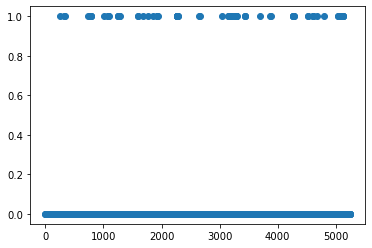

In [100]:
alerts = large_price_change(series)
plt.scatter(range(len(alerts)), alerts)

In [69]:
#Visualization of energy production

coal = pd.read_csv('../dataset/PowerPlant/COAL_production/28138.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
gas = pd.read_csv('../dataset/PowerPlant/GAS_production/28336.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lignite = pd.read_csv('../dataset/PowerPlant/LIGNITE_production/28266.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
nuc = pd.read_csv('../dataset/PowerPlant/NUC_production_capacity/21899.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [100]:
##utils

def clip(dataframe, start_date, end_date):
    return dataframe.loc[start_date:end_date]

def scaling(dataframe):
    for i in dataframe.columns:
        dataframe[i] = dataframe[i] / dataframe[i][0] * 100

In [71]:
len(gas), len(coal), len(lignite)

(79815, 79821, 79821)

In [72]:
coal, lignite = clip(coal, len(gas)), clip(lignite, len(gas))

In [73]:
idx = coal.index
d = {'coal': coal.values, 'gas':gas.values, 'lignite':lignite.values}
data = pd.DataFrame(d)
data.index = idx
data

,coal,gas,lignite
0,,,
2018-12-09 23:00:00,2406.751764,4526.992732,6289.799642
2018-12-09 23:15:00,2406.751764,4526.992732,6289.799642
2018-12-09 23:30:00,2406.751764,4526.992732,6289.799642
2018-12-09 23:45:00,2406.751764,4526.992732,6289.799642
2018-12-10 00:00:00,2395.437974,4319.124128,6261.357902
...,...,...,...
2021-03-20 07:30:00,4868.040000,12387.024260,11550.525000
2021-03-20 07:45:00,4812.036000,12259.875730,11433.219000
2021-03-20 08:00:00,4630.023000,12201.663150,11282.985000


In [74]:
scaling(data)
data

,coal,gas,lignite
0,,,
2018-12-09 23:00:00,100.000000,100.000000,100.000000
2018-12-09 23:15:00,100.000000,100.000000,100.000000
2018-12-09 23:30:00,100.000000,100.000000,100.000000
2018-12-09 23:45:00,100.000000,100.000000,100.000000
2018-12-10 00:00:00,99.529915,95.408241,99.547812
...,...,...,...
2021-03-20 07:30:00,202.265978,273.625892,183.638997
2021-03-20 07:45:00,199.939025,270.817217,181.773978
2021-03-20 08:00:00,192.376425,269.531317,179.385444


<AxesSubplot:xlabel='0'>

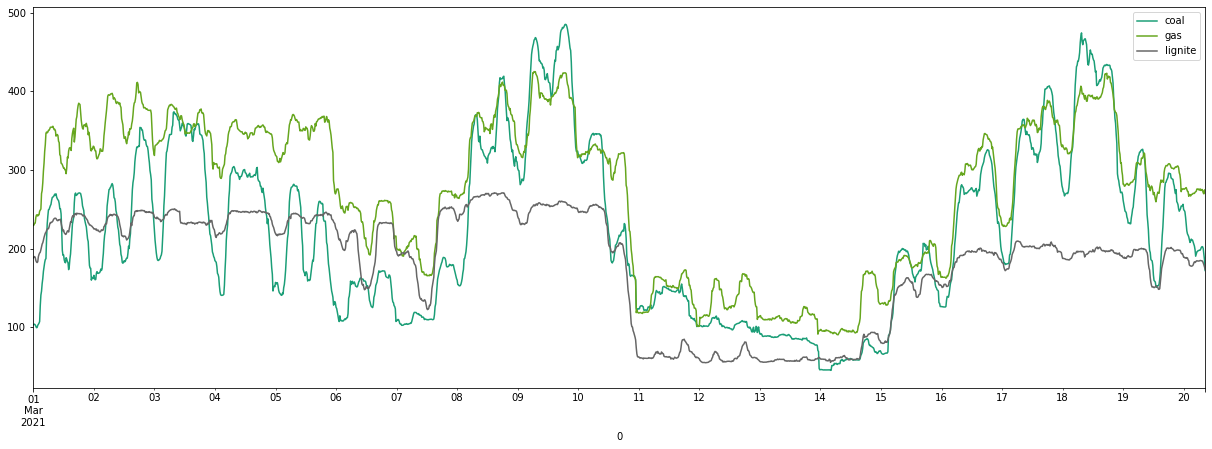

In [102]:
data_clipped = clip(data, '2021-03-01', '2021-03-20')
data_clipped.plot(colormap='Dark2', figsize=(21,7))

In [97]:
data.loc['2021-02-01':'2021-03-01']

,coal,gas,lignite
0,,,
2021-02-01 00:00:00,152.102226,179.552187,216.473159
2021-02-01 00:15:00,152.191724,180.567371,215.867846
2021-02-01 00:30:00,152.728713,180.905766,214.509981
2021-02-01 00:45:00,151.878480,180.770408,213.430232
2021-02-01 01:00:00,147.716813,179.619866,214.460901
...,...,...,...
2021-03-01 22:45:00,174.790025,324.689641,229.528297
2021-03-01 23:00:00,159.799073,324.114370,228.726666
2021-03-01 23:15:00,163.468500,327.159922,228.301310


In [114]:
series.to_frame()

,1
0,
2020-08-12 23:00:00,31.46
2020-08-13 00:00:00,37.12
2020-08-13 01:00:00,31.85
2020-08-13 02:00:00,27.32
2020-08-13 03:00:00,28.88
...,...
2021-03-20 05:00:00,51.18
2021-03-20 06:00:00,53.63
2021-03-20 07:00:00,68.54


In [133]:
##New alert: Cross-over strategy alert (BUY/SELL)

def cross_over(series, short_term_window=20, long_term_window=50):
    df = series.to_frame()
    df.columns = ['Price']
    # create short-term simple moving average column
    df['S_SMA'] = df['Price'].rolling(window = short_term_window, min_periods = 1).mean()
    # create long-term simple moving average column
    df['L_SMA'] = df['Price'].rolling(window = long_term_window, min_periods = 1).mean()
    # We create a signal column
    df['Signal'] = 0.0
    df['Signal'] = np.where(df['S_SMA'] > df['L_SMA'], 1.0, 0.0)
    df['Position'] = df['Signal'].diff()

    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    df['Price'].plot(color = 'k', label= 'Price') 
    df['S_SMA'].plot(color = 'b',label = '%d-day SMA' % (short_term_window)) 
    df['L_SMA'].plot(color = 'g', label = '%d-day SMA' % (long_term_window))
    # plot ‘buy’ signals
    plt.plot(df[df['Position'] == 1].index, 
            df['S_SMA'][df['Position'] == 1], 
            '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(df[df['Position'] == -1].index, 
            df['S_SMA'][df['Position'] == -1], 
            'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title('Price Signals for Energy Market', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

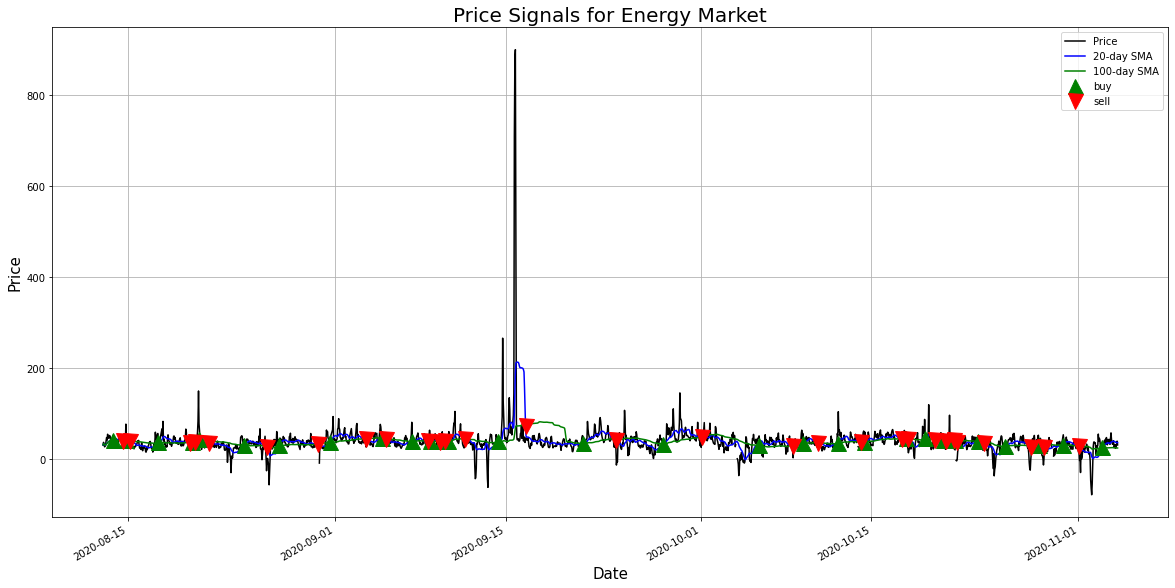

In [150]:
cross_over(series[0:2000], 20, 100)